In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
%matplotlib inline
DATA_DIR = path.join('..', 'data')

In [2]:
results = pd.read_csv(path.join(DATA_DIR, 'results.csv'),
                      names=['Init_station','Init_time','Init_count','Count_type']+list(range(7000)))
results.set_index(list(results.columns[:4]), inplace=True)
results.head()

0             1     \
Init_station Init_time Init_count Count_type                            
0            0         1          S           7947054.0  7.947054e+06   
                                  I                 1.0  1.006943e+00   
                                  R                 0.0  1.388889e-02   
             24        1          S           7947054.0  7.947054e+06   
                                  I                 1.0  1.006943e+00   

                                                      2             3     \
Init_station Init_time Init_count Count_type                               
0            0         1          S           7.947054e+06  7.947054e+06   
                                  I           1.013934e+00  1.020973e+00   
                                  R           2.787421e-02  4.195662e-02   
             24        1          S           7.947054e+06  7.947054e+06   
                                  I           1.013934e+00  1.020973e+00   

                                                      4             5     \
Init_station Init_time Init_count Count_type                               
0            0         1          S           7.947054e+06  7.947054e+06   
                                  I           1.028062e+00  1.035199e+00   
                                  R           5.613680e-02  7.041544e-02   
             24        1          S           7.947054e+06  7.947054e+06   
                                  I           1.028062e+00  1.035199e+00   

                                                      6             7     \
Init_station Init_time Init_count Count_type                               
0            0         1          S           7.947054e+06  7.947054e+06   
                                  I           1.042386e+00  1.049623e+00   
                                  R           8.479320e-02  9.927078e-02   
             24        1          S           7.947054e+06  7.947054e+06   
                                  I           1.042386e+00  1.049623e+00   

                                                      8             9     \
Init_station Init_time Init_count Count_type                               
0            0         1          S           7.947054e+06  7.947054e+06   
                                  I           1.056910e+00  1.064248e+00   
                                  R           1.138489e-01  1.285282e-01   
             24        1          S           7.947054e+06  7.947054e+06   
                                  I           1.056910e+00  1.064248e+00   

                                              ...   6990  6991  6992  6993  \
Init_station Init_time Init_count Count_type  ...                            
0            0         1          S           ...    NaN   NaN   NaN   NaN   
                                  I           ...    NaN   NaN   NaN   NaN   
                                  R           ...    NaN   NaN   NaN   NaN   
             24        1          S           ...    NaN   NaN   NaN   NaN   
                                  I           ...    NaN   NaN   NaN   NaN   

                                              6994  6995  6996  6997  6998  \
Init_station Init_time Init_count Count_type                                 
0            0         1          S            NaN   NaN   NaN   NaN   NaN   
                                  I            NaN   NaN   NaN   NaN   NaN   
                                  R            NaN   NaN   NaN   NaN   NaN   
             24        1          S            NaN   NaN   NaN   NaN   NaN   
                                  I            NaN   NaN   NaN   NaN   NaN   

                                              6999  
Init_station Init_time Init_count Count_type        
0            0         1          S            NaN  
                                  I            NaN  
                                  R            NaN  
             24        1          S            N

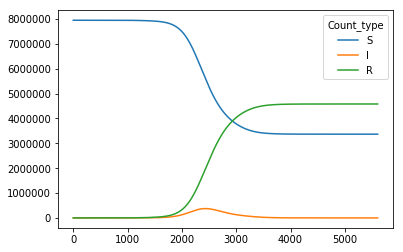

In [14]:
results.xs((71,0,1), level=('Init_station','Init_time','Init_count')).T.plot()

In [3]:
filtered=results.xs((10, 'I'), level=('Init_count', 'Count_type')).fillna(0)

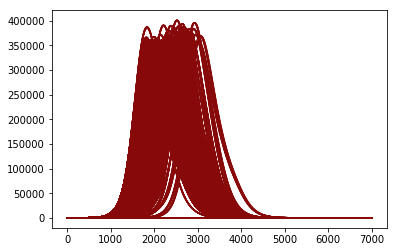

In [4]:
filtered.T.plot(legend=None, color='#870909')

In [5]:
peaks = pd.concat([filtered.T.idxmax(), filtered.T.max()], axis=1)
peaks.columns = ['Time', 'Value']
peaks['Time'] = peaks['Time'] / 24

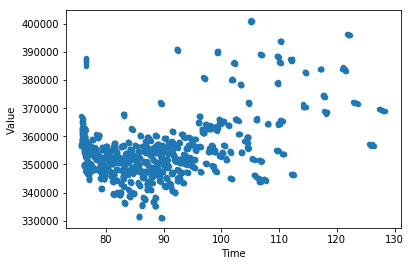

In [6]:
peaks[peaks['Value'] > 3000].plot.scatter('Time', 'Value')

In [7]:
peaks[peaks['Value'] <= 3000]

Time        Value
Init_station Init_time                        
229          0          41.708333  2142.129357
             24         41.708333  2142.085861
             48         41.708333  2142.047030
             72         41.708333  2142.076603
             96         41.708333  2142.042727
             120        41.708333  2142.075869
             144        41.708333  2142.104761

In [8]:
peaks[peaks['Value'] > 370000][peaks['Time'] < 90]

/mnt/c/Users/Josh/Google Drive_old/Uni/Part III/project/data/env/lib/python3.4/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Time          Value
Init_station Init_time                          
71           0          89.458333  372078.685047
             24         89.500000  371681.547189
             48         89.541667  371387.464176
             72         89.583333  371363.433028
             96         89.666667  371432.262529
             120        89.625000  371662.910551
             144        89.583333  371866.253478
351          0          76.500000  387049.034181
             24         76.500000  387592.507566
             48         76.500000  387861.962040
             72         76.500000  386905.129096
             96         76.500000  386556.889747
             120        76.583333  385734.843749
             144        76.500000  385109.776168